In [42]:
include("../src/SphereIFSCalib.jl")

using TwoDimensional, Zygote, StatsBase, Plots
gr();

# Constantes:

In [46]:
# wavelengths
const λ1 = 987.72e-9# laser 1 
const λ2 = 1123.71e-9# laser 2 
const λ3 = 1309.37e-9# laser 3
const λ4 = 1545.10e-9  # laser 4  
const λlaser = [λ1,λ2,λ3,λ4]
#const λ0 = λ1# reference
const λ0 = mean(λlaser);# reference



In [61]:
laser =  LaserModel(λlaser,a0,fwhm0)

# model of the LensletModel
bbox = BoundingBox(xmin=1, ymin=1, xmax=10, ymax=50); #size of bbox
lmod = LensletModel(λ0,laser,bbox);



LoadError: [91mMethodError: no method matching LaserModel(::Array{Float64,1}, ::Float64, ::Array{Float64,1})[39m
[91m[0mClosest candidates are:[39m
[91m[0m  LaserModel(::Any, ::Any, ::Any, [91m::Any[39m) at /home/user/stage/PIC.jl/src/SphereIFSCalib.jl:55[39m
[91m[0m  LaserModel(::Array{Float64,1}, [91m::Array{Float64,1}[39m, ::Array{Float64,1}) at /home/user/stage/PIC.jl/src/SphereIFSCalib.jl:61[39m
[91m[0m  LaserModel([91m::Integer[39m, [91m::Array{Float64,1}[39m, ::Array{Float64,1}, [91m::Array{Float64,1}[39m) at /home/user/stage/PIC.jl/src/SphereIFSCalib.jl:55[39m

# Données & initialisation

In [56]:
data = rand(100,100)
weight = Float64.(rand(100,100).>0.1);

#Coeff c_0, c_1, c_2, c_3 dans coef_pol_x.txt, coef_pol_y.txt:
Cinit = [[ -1.0237289156740715e+01  -5.4138426304907739e-01  -8.8286351868028434e-01 0 ]; [4.5500191394978167e+01 9.0070454695219098e+01 -5.1670858160147510e+01 0]] 
#Cinit = rand(Float64,2,4); [[ 6.2 0 0 0 ]; [25 5e7 0 0]]
a0= 5.9515853213916489e+03; #rand(Float64,4)
fwhm0= rand(Float64,4);
m = rand(100,100);

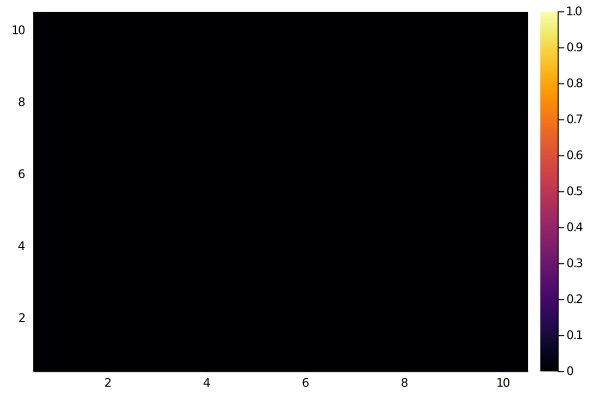

In [52]:
lmod = LensletModel(λ0,laser,bbox);
UpdateDispModel(lmod.dmodel,Cinit)
limage = LensletLaserImage(lmod,laser)
heatmap(limage)

# Modèles

In [53]:
likelihood(a,fwhm,C) = GaussianSpotsCost(data,weight,lmod,a,fwhm,C)
cost = likelihood(a0,fwhm0,Cinit)

∇cost = gradient(likelihood,a0,fwhm0,Cinit)

function  g(a::Array{Float64,1},fwhm::Array{Float64,1},C::Array{Float64,2}) 
    return sum(GaussianSpotsModel(lmod,a,fwhm,C))
    
end

LoadError: [91mMethodError: no method matching GaussianSpotsCost(::Array{Float64,2}, ::Array{Float64,2}, ::LensletModel, ::Float64, ::Array{Float64,1}, ::Array{Float64,2})[39m
[91m[0mClosest candidates are:[39m
[91m[0m  GaussianSpotsCost(::Array{Float64,2}, ::Array{Float64,2}, ::LensletModel, [91m::LaserModel[39m, ::Array{Float64,1}, [91m::Array{Float64,1}[39m, [91m::Array{Float64,2}[39m) at /home/user/stage/PIC.jl/src/SphereIFSCalib.jl:146[39m